In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('titanic (1).csv')
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
401,402,0,3,"Adams, Mr. John",male,26.0,0,0,341826,8.0500,NaN,S
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,NaN,1,0,376564,16.1000,NaN,S
573,574,1,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S
335,336,0,3,"Denkoff, Mr. Mitto",male,NaN,0,0,349225,7.8958,NaN,S
722,723,0,2,"Gillespie, Mr. William Henry",male,34.0,0,0,12233,13.0000,NaN,S
572,573,1,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0,0,PC 17474,26.3875,E25,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S


In [6]:
df.shape

(891, 12)

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [12]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [14]:
x_new=x.drop(['PassengerId','Name','Ticket'],axis=1)

In [15]:
x_new.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
793,1,male,NaN,0,0,30.6958,NaN,C
289,3,female,22.00,0,0,7.7500,NaN,Q
66,2,female,29.00,0,0,10.5000,F33,S
755,2,male,0.67,1,1,14.5000,NaN,S
643,3,male,NaN,0,0,56.4958,NaN,S
16,3,male,2.00,4,1,29.1250,NaN,Q
165,3,male,9.00,0,2,20.5250,NaN,S
410,3,male,NaN,0,0,7.8958,NaN,S
324,3,male,NaN,8,2,69.5500,NaN,S
554,3,female,22.00,0,0,7.7750,NaN,S


In [16]:
x_new['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [17]:
x_new['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<Axes: xlabel='Sex', ylabel='Survived'>

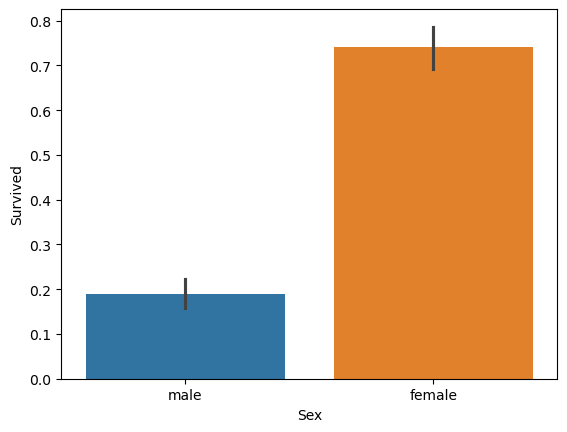

In [19]:
sns.barplot(data=df,x='Sex',y='Survived',hue='Sex')

In [20]:
x_new['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [23]:
gender=pd.get_dummies(x_new['Sex'],dtype=int)

In [24]:
gender

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [25]:
x_new=pd.concat([x_new,gender],axis=1)

In [26]:
x_new

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,female,male
0,3,male,22.0,1,0,7.2500,NaN,S,0,1
1,1,female,38.0,1,0,71.2833,C85,C,1,0
2,3,female,26.0,0,0,7.9250,NaN,S,1,0
3,1,female,35.0,1,0,53.1000,C123,S,1,0
4,3,male,35.0,0,0,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S,0,1
887,1,female,19.0,0,0,30.0000,B42,S,1,0
888,3,female,NaN,1,2,23.4500,NaN,S,1,0
889,1,male,26.0,0,0,30.0000,C148,C,0,1


In [27]:
x_new=x_new.drop(['Sex'],axis=1)

In [28]:
x_new.sample(10)

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,female,male
93,3,26.0,1,2,20.5750,NaN,S,0,1
227,3,20.5,0,0,7.2500,NaN,S,0,1
735,3,28.5,0,0,16.1000,NaN,S,0,1
362,3,45.0,0,1,14.4542,NaN,C,1,0
240,3,NaN,1,0,14.4542,NaN,C,1,0
510,3,29.0,0,0,7.7500,NaN,Q,0,1
740,1,NaN,0,0,30.0000,D45,S,0,1
132,3,47.0,1,0,14.5000,NaN,S,1,0
418,2,30.0,0,0,13.0000,NaN,S,0,1
535,2,7.0,0,2,26.2500,NaN,S,1,0


In [29]:
x_new.isnull().sum()

Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
female        0
male          0
dtype: int64

In [47]:
x_new['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [50]:
# Drop the cabin
x_new=x_new.drop(['Cabin'],axis=1)

In [51]:
x_new.sample(10)

,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
591,1,52.0,1,0,78.2667,C,1,0
687,3,19.0,0,0,10.1708,S,0,1
6,1,54.0,0,0,51.8625,S,0,1
579,3,32.0,0,0,7.9250,S,0,1
289,3,22.0,0,0,7.7500,Q,1,0
492,1,55.0,0,0,30.5000,S,0,1
836,3,21.0,0,0,8.6625,S,0,1
595,3,36.0,1,1,24.1500,S,0,1
73,3,26.0,1,0,14.4542,C,0,1
16,3,2.0,4,1,29.1250,Q,0,1


In [52]:
mean_age=x_new['Age'].mean()

In [53]:
mean_age

29.69911764705882

In [54]:
x_new['new_age']=x['Age'].fillna(mean_age)

In [55]:
x_new.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male,new_age
0,3,22.0,1,0,7.2500,S,0,1,22.0
1,1,38.0,1,0,71.2833,C,1,0,38.0
2,3,26.0,0,0,7.9250,S,1,0,26.0
3,1,35.0,1,0,53.1000,S,1,0,35.0
4,3,35.0,0,0,8.0500,S,0,1,35.0


In [56]:
x_new=x_new.drop(['Age'],axis=1)

In [57]:
x_new.isnull().sum()

Pclass      0
SibSp       0
Parch       0
Fare        0
Embarked    2
female      0
male        0
new_age     0
dtype: int64

In [58]:
new_emb=pd.get_dummies(x_new['Embarked'],dtype=int)

In [59]:
new_emb.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [60]:
x_new=pd.concat([x_new, new_emb],axis=1)

In [61]:
x_new.head()

,Pclass,SibSp,Parch,Fare,Embarked,female,male,new_age,C,Q,S
0,3,1,0,7.2500,S,0,1,22.0,0,0,1
1,1,1,0,71.2833,C,1,0,38.0,1,0,0
2,3,0,0,7.9250,S,1,0,26.0,0,0,1
3,1,1,0,53.1000,S,1,0,35.0,0,0,1
4,3,0,0,8.0500,S,0,1,35.0,0,0,1


In [62]:
x_new=x_new.drop(['Embarked','S'],axis=1)

In [63]:
x_new.head()

,Pclass,SibSp,Parch,Fare,female,male,new_age,C,Q
0,3,1,0,7.2500,0,1,22.0,0,0
1,1,1,0,71.2833,1,0,38.0,1,0
2,3,0,0,7.9250,1,0,26.0,0,0
3,1,1,0,53.1000,1,0,35.0,0,0
4,3,0,0,8.0500,0,1,35.0,0,0


In [64]:
x_new.isnull().sum()

Pclass     0
SibSp      0
Parch      0
Fare       0
female     0
male       0
new_age    0
C          0
Q          0
dtype: int64

In [65]:
x_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pclass   891 non-null    int64  
 1   SibSp    891 non-null    int64  
 2   Parch    891 non-null    int64  
 3   Fare     891 non-null    float64
 4   female   891 non-null    int32  
 5   male     891 non-null    int32  
 6   new_age  891 non-null    float64
 7   C        891 non-null    int32  
 8   Q        891 non-null    int32  
dtypes: float64(2), int32(4), int64(3)
memory usage: 48.9 KB


In [66]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_new,y,test_size=0.2)

In [70]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 9)
(179, 9)
(712,)
(179,)


In [71]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [72]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [74]:
model.score(x_test,y_test)

0.8100558659217877

In [75]:
model.predict([[3,0,0,8.0500,0,1,35.0,0,0]])

C:\Users\MR OSMAN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [76]:
y.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [80]:
# model.predict_proba(x_test)

In [79]:
# from sklearn.metrics import accuracy_score